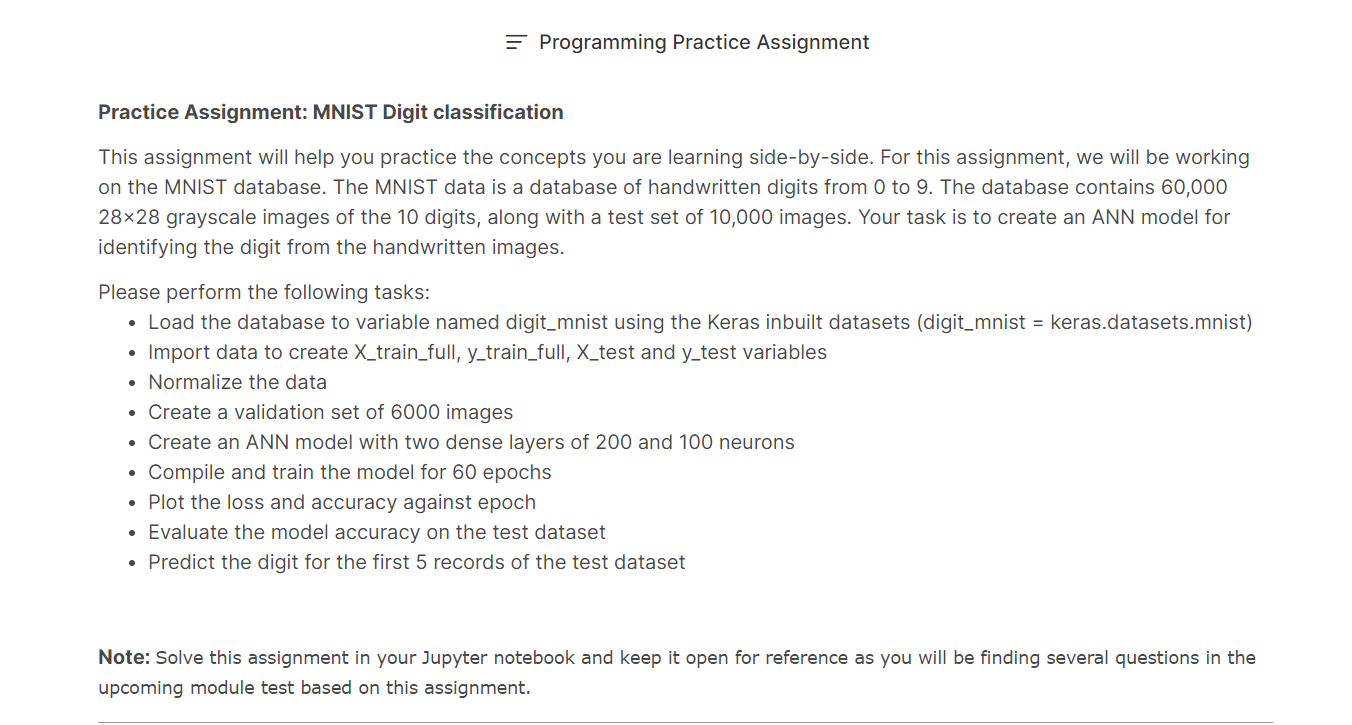

__Name: Khushal Kishor Koli__

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
digit_mnist = keras.datasets.mnist

In [5]:
(X_train_full, y_train_full),(X_test, y_test) = digit_mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


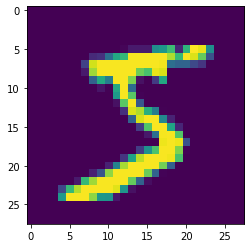

In [6]:
plt.imshow(X_train_full[0])

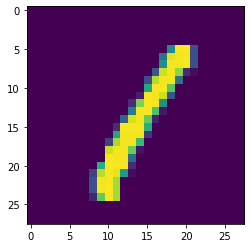

In [7]:
plt.imshow(X_train_full[3])

In [20]:
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [21]:
X_train_full.shape

(60000, 28, 28)

60000 Observations

28 pixels 

28 pixels

In [22]:
y_train_full.shape 

(60000,)

60000 observations of number outputs (0..9)

In [25]:
y_test.shape

(10000,)

10000 observations of number outputs (0..9)

In [24]:
X_test.shape

(10000, 28, 28)

60000 Observations

28 pixels

28 pixels

### Data Normalization
Normalize data dimensions so they are approximately the same scale.

In [27]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Splitting the Dataset

In [28]:
X_valid, X_train = X_train_n[:6000] , X_train_n[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]
X_test = X_test_n

In [29]:
X_valid.shape , X_train.shape, y_valid.shape, y_train.shape

((6000, 28, 28), (54000, 28, 28), (6000,), (54000,))

### Model Architecture

In [30]:
np.random.seed(18)
tf.random.set_seed(18)

In [31]:
#Create an instance of keras model
model = keras.models.Sequential()

# Input layer.
# Flatten() -To convert the 2d array of 28X28 pixels to 784 pixels in single array
model.add(keras.layers.Flatten(input_shape=[28,28]))

# Hidden Layer 1
# Dense(200, activation="relu") specifies the number of neurons= 200 and activation function as ReLU 
model.add(keras.layers.Dense(200, activation="relu"))

# Hidden Layer 2 
model.add(keras.layers.Dense(100, activation="relu"))

# Output Layer
# Dense(10, activation="softmax") specifies the number of neurons= no of output variables=10 and activation function as Softmax
model.add(keras.layers.Dense(10, activation="softmax"))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


In [33]:
#We can access the parameters using get_weight() method
weights, biases = model.layers[1].get_weights()

In [34]:
weights

array([[ 0.07727794, -0.01194589, -0.04098374, ...,  0.0144522 ,
        -0.04285529,  0.04930459],
       [ 0.01841157,  0.02297699,  0.03219566, ..., -0.03840756,
        -0.04104814,  0.06712651],
       [ 0.03646972,  0.02858078,  0.02377735, ...,  0.00038465,
         0.04752183, -0.05678229],
       ...,
       [-0.00605995, -0.04663409, -0.05044404, ...,  0.02987318,
        -0.00923272,  0.00128665],
       [-0.0437037 , -0.03147749,  0.06015003, ..., -0.01300321,
         0.07741529, -0.00438681],
       [-0.0699911 ,  0.07025877, -0.03772755, ..., -0.07669596,
         0.04813391, -0.06180896]], dtype=float32)

### Compiling and Training the Neural Network model

In [35]:
# loss function: *sparse_categorical_crossentropy* because y variable or the target variable is in form of labels
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd", metrics=["accuracy"])

In [36]:
model_history = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.6239 - accuracy: 0.8369 - val_loss: 0.3050 - val_accuracy: 0.9162
Epoch 2/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2909 - accuracy: 0.9172 - val_loss: 0.2393 - val_accuracy: 0.9333
Epoch 3/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2372 - accuracy: 0.9317 - val_loss: 0.2010 - val_accuracy: 0.9435
Epoch 4/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2026 - accuracy: 0.9422 - val_loss: 0.1785 - val_accuracy: 0.9513
Epoch 5/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1779 - accuracy: 0.9487 - val_loss: 0.1591 - val_accuracy: 0.9558
Epoch 6/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1590 - accuracy: 0.9545 - val_loss: 0.1452 - val_accuracy: 0.9602
Epoch 7/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1430 - accuracy: 0.9588 - val_loss: 0.1358 - val_accuracy:

1688/1688 [==============================] - 5s 3ms/step - loss: 0.0086 - accuracy: 0.9993 - val_loss: 0.0780 - val_accuracy: 0.9787
Epoch 58/60
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0084 - accuracy: 0.9993 - val_loss: 0.0777 - val_accuracy: 0.9793
Epoch 59/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0080 - accuracy: 0.9994 - val_loss: 0.0767 - val_accuracy: 0.9798
Epoch 60/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0077 - accuracy: 0.9995 - val_loss: 0.0787 - val_accuracy: 0.9792


In [37]:
model_history.params

{'verbose': 1, 'epochs': 60, 'steps': 1688}

In [38]:
model_history.history

{'loss': [0.6239380836486816,
  0.2908928096294403,
  0.23718777298927307,
  0.20256273448467255,
  0.17789816856384277,
  0.15899530053138733,
  0.14299127459526062,
  0.1301455944776535,
  0.11930781602859497,
  0.10982869565486908,
  0.1015205830335617,
  0.09423315525054932,
  0.08711174130439758,
  0.08170513063669205,
  0.07628310471773148,
  0.07152315229177475,
  0.06686758995056152,
  0.06307089328765869,
  0.059522636234760284,
  0.05627511441707611,
  0.052848368883132935,
  0.049993254244327545,
  0.0473862886428833,
  0.044765811413526535,
  0.04228981211781502,
  0.040212344378232956,
  0.03805636614561081,
  0.036166995763778687,
  0.034127671271562576,
  0.03232381492853165,
  0.0308133065700531,
  0.02932812087237835,
  0.027583587914705276,
  0.026163049042224884,
  0.025132305920124054,
  0.023729631677269936,
  0.022434696555137634,
  0.02134290710091591,
  0.020291300490498543,
  0.019376680254936218,
  0.018341027200222015,
  0.017487484961748123,
  0.016545711085

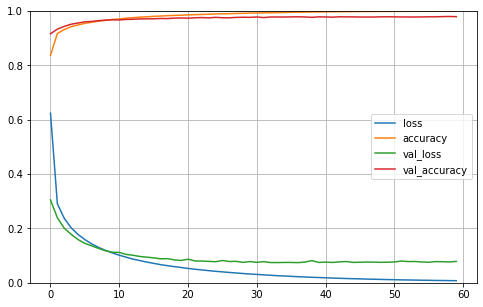

In [39]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [40]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9797


[0.0705941915512085, 0.9797000288963318]

__Pretty Great Accuracy!__

### Using model to identify numbers

In [41]:
# using 5 records from test set to put in model to identify what number it is.
input_to_model = X_test[:5]

In [42]:
# The model predictinput_to_models the probability for every class labels for each record.
# the class labels which has highest probability is suppose to be the object.
y_proba = model.predict(input_to_model)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [44]:
# If we want to predict the class directly rather than these probabilities.
y_pred = np.argmax(model.predict(input_to_model),axis=1)
y_pred

array([7, 2, 1, 0, 4], dtype=int64)

__Testing if the model has predicted correctly or not__

AxesImage(54,36;334.8x217.44)


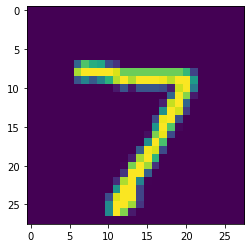

In [45]:
print(plt.imshow(input_to_model[0]))

AxesImage(54,36;334.8x217.44)


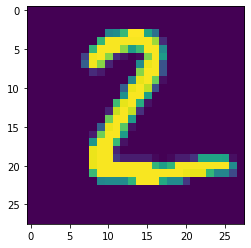

In [46]:
print(plt.imshow(input_to_model[1]))

AxesImage(54,36;334.8x217.44)


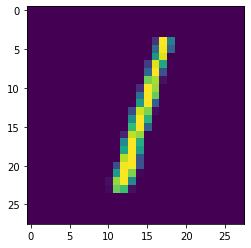

In [47]:
print(plt.imshow(input_to_model[2]))

AxesImage(54,36;334.8x217.44)


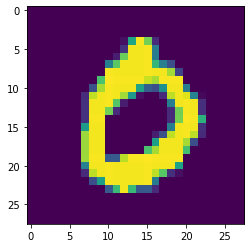

In [48]:
print(plt.imshow(input_to_model[3]))

AxesImage(54,36;334.8x217.44)


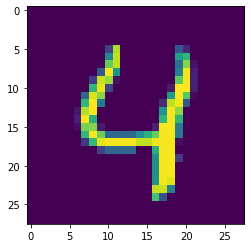

In [49]:
print(plt.imshow(input_to_model[4]))